## Exercise

### 1. Make predictions on the entire test dataset and plot a confusion matrix for the results of our model compared to the truth labels

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import os

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    !pip install -q torchinfo
    from torchinfo import summary

# Device Agnostic Code
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [27]:
# Download and Load the going_modular scripts
try:
    from going_modular import data_setup, dataset, engine, utils
except ImportError:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/LuluW8071/Data-Science/
    !cp -r Data-Science/Pytorch/05_PyTorch_Going_Modular/going_modular .
    from going_modular import data_setup, dataset, engine, utils

### Prepare Data and Model

In [ ]:
# Setting up directories
train_dir = "dataset/train"
test_dir = "dataset/test"

In [ ]:
# Download and Get the pretrained model weights for transform.compose
weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
model = torchvision.models.efficientnet_b2(weights=weights).to(device)

auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[288]
    resize_size=[288]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [ ]:
# Creating training and test dataloaders and class_names list
train_dataloader, test_dataloader, class_names = dataset.create_dataloaders(train_dir,
                                                                            test_dir,
                                                                            auto_transforms,
                                                                            num_workers=0,
                                                                            batch_size=256)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x794ce981eec0>,
 ['donuts',
  'dumplings',
  'ice_cream',
  'pizza',
  'ramen',
  'samosa',
  'steak',
  'sushi'])

In [ ]:
# Freezing the base layer of model and changing output layers
for param in model.features.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(nn.Dropout(p=0.3, inplace=True),
                                 nn.Linear(in_features=1408,
                                           out_features=len(class_names),
                                           bias=True)).to(device)

In [ ]:
# Generating a sumamry of our model
summary(model=model,
        input_size=(256, 3, 288, 288),
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [256, 3, 288, 288]   [256, 8]             --                   Partial
├─Sequential (features)                                      [256, 3, 288, 288]   [256, 1408, 9, 9]    --                   False
│    └─Conv2dNormActivation (0)                              [256, 3, 288, 288]   [256, 32, 144, 144]  --                   False
│    │    └─Conv2d (0)                                       [256, 3, 288, 288]   [256, 32, 144, 144]  (864)                False
│    │    └─BatchNorm2d (1)                                  [256, 32, 144, 144]  [256, 32, 144, 144]  (64)                 False
│    │    └─SiLU (2)                                         [256, 32, 144, 144]  [256, 32, 144, 144]  --                   --
│    └─Sequential (1)                                        [256, 32, 144, 144]  [256,

### Train Model

In [ ]:
# Setup loss_fn and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training the model
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       loss_fn=loss_fn,
                       optimizer=optimizer,
                       epochs=25,
                       device=device)

  0%|          | 0/25 [00:00<?, ?it/s]


Epoch: 1 | Train loss: 1.6391 - Train acc: 55.97% -- Test_loss: 1.1153 -- Test_acc: 86.83%

Epoch: 2 | Train loss: 1.0443 - Train acc: 79.15% -- Test_loss: 0.7720 -- Test_acc: 87.68%

Epoch: 3 | Train loss: 0.7918 - Train acc: 82.97% -- Test_loss: 0.6153 -- Test_acc: 89.27%

Epoch: 4 | Train loss: 0.6687 - Train acc: 84.41% -- Test_loss: 0.5333 -- Test_acc: 89.54%

Epoch: 5 | Train loss: 0.6048 - Train acc: 85.48% -- Test_loss: 0.4782 -- Test_acc: 90.03%

Epoch: 6 | Train loss: 0.5599 - Train acc: 85.22% -- Test_loss: 0.4429 -- Test_acc: 90.03%

Epoch: 7 | Train loss: 0.5305 - Train acc: 85.90% -- Test_loss: 0.4200 -- Test_acc: 90.13%

Epoch: 8 | Train loss: 0.5032 - Train acc: 86.33% -- Test_loss: 0.3929 -- Test_acc: 90.81%

Epoch: 9 | Train loss: 0.4785 - Train acc: 86.68% -- Test_loss: 0.3769 -- Test_acc: 91.06%

Epoch: 10 | Train loss: 0.4564 - Train acc: 87.41% -- Test_loss: 0.3640 -- Test_acc: 91.11%

Epoch: 11 | Train loss: 0.4468 - Train acc: 87.31% -- Test_loss: 0.3522 -- Tes

### Plot Loss Curves

In [ ]:
# Download and Load the helper_functions scripts
import requests
from pathlib import Path

# Download helper function from opensource scripts files
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download')
else:
  print('Downloading helper_functions.py')
  request = requests.get("https://raw.githubusercontent.com/LuluW8071/Data-Science/main/assets/helper_functions.py")
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)
  print('Download complete')

helper_functions.py already exists, skipping download


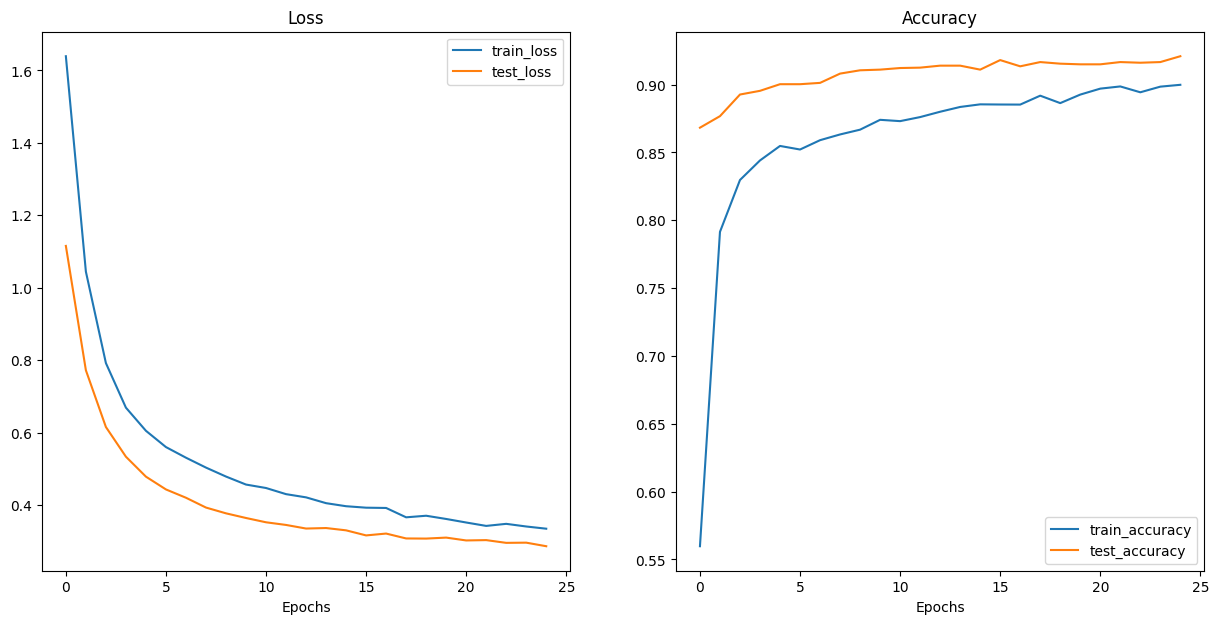

In [ ]:
import helper_functions as func

# Plot the loss curves of our model
func.plot_loss_curves(results)

### Predict and Plot Images


In [ ]:
from typing import List, Tuple
from PIL import Image
from pathlib import Path

# Predict and Plot the model
def pred_and_plot_image(model,
                        image_path,
                        class_names,
                        image_size = (288, 288),
                        transform = None,
                        device = device):
  img = Image.open(image_path)
  if transform is not None:
    image_transform = transform
  else:
    image_transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

  model.to(device)
  model.eval()
  with torch.inference_mode():
    transformed_image = image_transform(img).unsqueeze(dim=0)
    target_image_pred = model(transformed_image.to(device))

  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  plt.figure()
  plt.imshow(img)
  plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
  plt.axis(False);


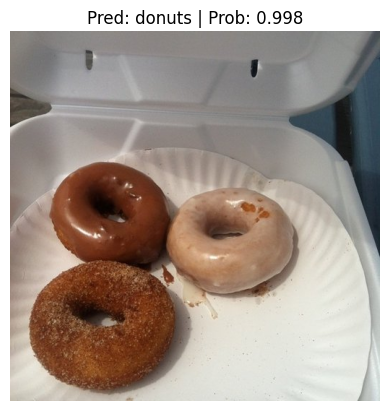

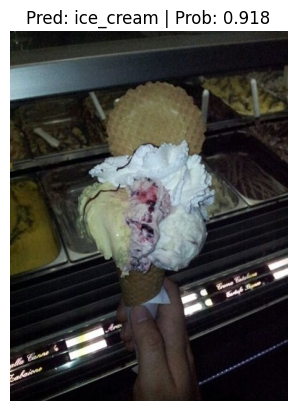

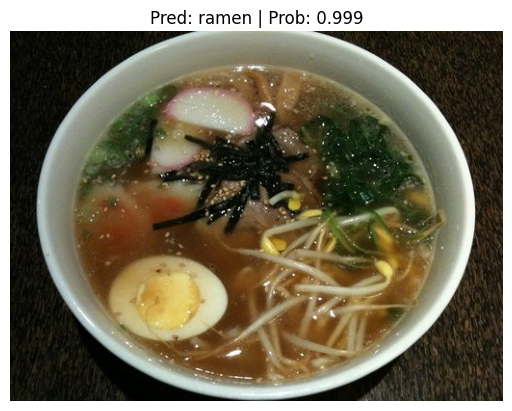

In [ ]:
import random

num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg"))
test_image_path_sample = random.sample(population=test_image_path_list,
                                       k=num_images_to_plot)

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=class_names,
                        image_size=(224, 224))

### Make predictions on the entire test dataset with the model

In [ ]:
from tqdm.auto import tqdm

# Make prediciton with trained model
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader,
                   desc = "Making predictions...\t"):
    X, y = X.to(device), y.to(device)
    y_logits = model(X)

    # Turn prediciton from logits -> prediciton probabilities -> prediciton labels
    y_pred = torch.softmax(y_logits.squeeze(), dim = 0).argmax(dim = 1 )
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10], len(y_pred_tensor)

Making predictions...	:   0%|          | 0/8 [00:00<?, ?it/s]

(tensor([0, 3, 3, 3, 7, 0, 0, 0, 4, 0]), 1850)

### Make a confusion matrix with the test preds and the truth labels

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend

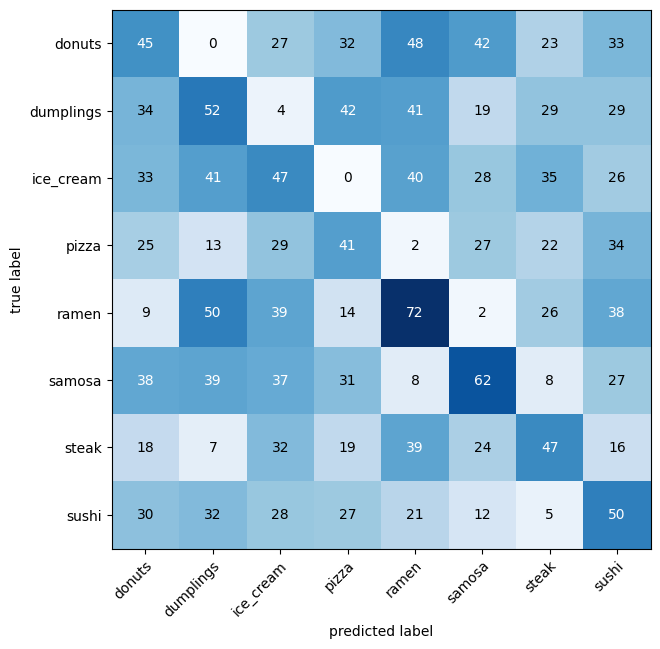

In [19]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Get the truth labels for test dataset
test_truth = torch.cat([y for X, y in test_dataloader])

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names), task = 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_truth)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names = class_names,         # turn the row and column labels into class names
    figsize = (10, 7)
);

### Save the Model

In [29]:
# Saving Model
utils.save_model(model=model,
                 target_dir="models/",
                 model_name="food_efficient_net_b2.pth")

[INFO] Saving model to: models/food_efficient_net_b2.pth
